In [4]:
import sklearn
import pandas_datareader.data as dr
import numpy
import datetime as dt
import matplotlib.pyplot as plt

In [19]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 8, 31)

df = dr.DataReader("F", 'yahoo', start, end)

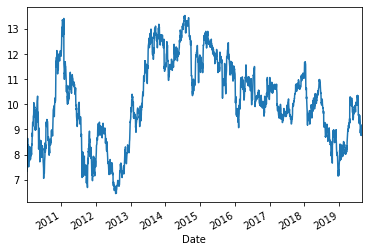

In [28]:
df["Adj Close"].plot();